In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(123)

In [2]:
x = np.linspace(-5,5,11)
print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [3]:
error = np.random.normal(0,1,11) # create some errors
print(error)

[ 0.03794701  0.9393282  -0.56855316 -1.85562684  1.27865602 -0.23530576
 -1.30332973  1.18239218 -1.52391059  0.67737337 -0.55653703]


In [4]:
y = 2*x + error
sd = np.ones(11)

<Container object of 3 artists>

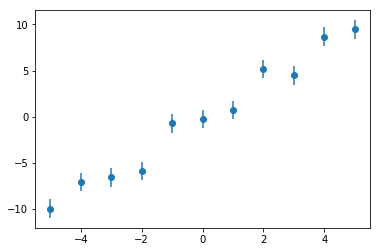

In [5]:
plt.errorbar(x,y,yerr=sd,fmt="o")

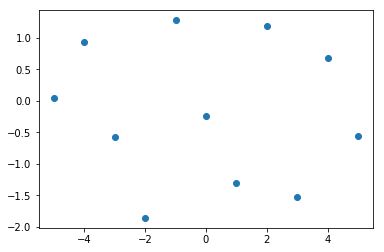

In [6]:
res = y - 2*x
plt.plot(x,res,"o")

In [7]:
p = np.polyfit(x,y,1)
print(p)

[ 1.96916128 -0.1752333 ]


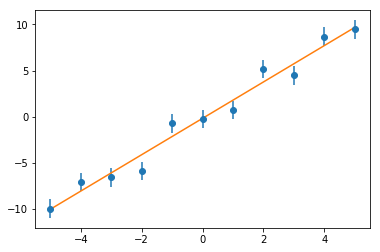

In [8]:
yfit = p[1] +p[0]*x
plt.errorbar(x,y,yerr=sd,fmt="o")
plt.plot(x,yfit)

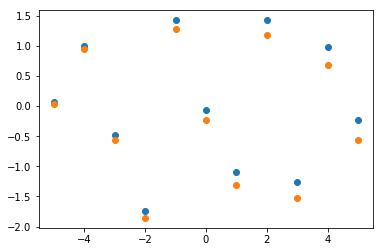

In [9]:
resfit = y - yfit
plt.plot(x,resfit,"o")
plt.plot(x,res,"o")

In [10]:
y2 = 2*x + 0.1*x**2 + np.random.normal(0,1,11)

In [11]:
p1 = np.polyfit(x,y2,1)
print(p1)

[ 2.07832941  0.52105292]


In [12]:
p2 = np.polyfit(x,y2,2)
print(p2)

[ 0.03372789  2.07832941  0.18377398]


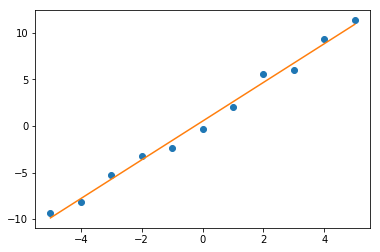

In [13]:
y2fit = p1[1] + p1[0]*x
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

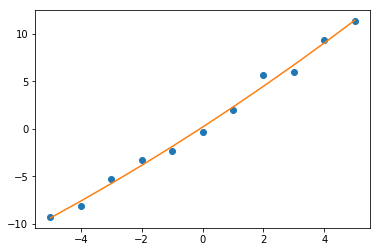

In [14]:
y2fit = p2[2] + p2[1]*x + p2[0]*x**2
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

In [15]:
chisq_list = []
for i in range(1000):
    y=2*x +np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

(array([ 0.01288143,  0.03993244,  0.07342417,  0.10369554,  0.09210225,
         0.10111925,  0.0727801 ,  0.0521698 ,  0.03928837,  0.02705101,
         0.00837293,  0.01094922,  0.00322036,  0.0045085 ,  0.00064407,
         0.00128814,  0.        ,  0.        ,  0.        ,  0.00064407]),
 array([  0.86220673,   2.41482898,   3.96745124,   5.52007349,
          7.07269574,   8.625318  ,  10.17794025,  11.73056251,
         13.28318476,  14.83580701,  16.38842927,  17.94105152,
         19.49367378,  21.04629603,  22.59891829,  24.15154054,
         25.70416279,  27.25678505,  28.8094073 ,  30.36202956,  31.91465181]),
 <a list of 20 Patch objects>)

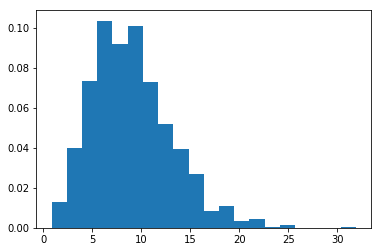

In [16]:
plt.hist(chisq,bins=20,normed=True)

In [17]:
print(chisq.mean())

9.04834692311


In [18]:
from scipy.stats import chi2

In [19]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,9)

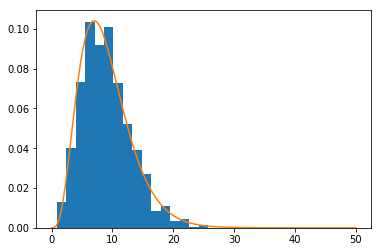

In [20]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [21]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

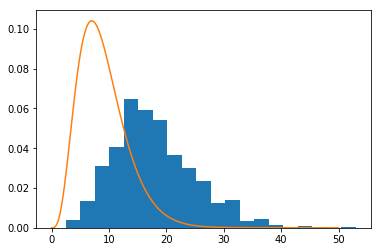

In [22]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [23]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,2)
    res = y-p[0]*x**2 - p[1]*x - p[2]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

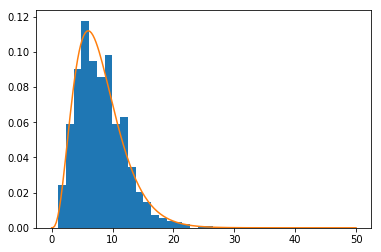

In [24]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,8)
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

(array([ 1.82273323,  0.04772189]), array([[  1.70690119e-02,   6.89472420e-19],
       [  6.89472420e-19,   1.70690119e-01]]))


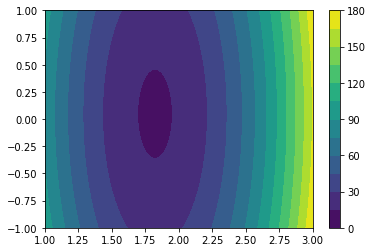

In [26]:
# let us plot the two-dimensional chi^2 distribution
m = np.linspace(1,3,401)
b = np.linspace(-1,1,201)

# calculate the two dimensional chi^2 matrix
def chi2linefit(M,B,datax,datay):
    res1 = M*datax[:,np.newaxis,np.newaxis]+B
    res2 = (y - res1.T).T
    res2 = res2**2
    chisquare = np.sum(res2,axis=0)
    return chisquare

x = np.linspace(-5,5,11)
y=2*x + np.random.normal(0,1,11)
print(np.polyfit(x,y,1,cov=True))
#print(x.shape,y.shape)


M,B = np.meshgrid(m,b)
#print(M.shape)
Z = chi2linefit(M,B,x,y)
plt.contourf(M, B, Z,10)
plt.colorbar()

In [ ]:
# in the following cells, I am illustrating how I came up with the matrix calculation
m = np.array([[1,2],[3,4]])
m.shape

In [ ]:
x = np.array([1,2,3]).T
x = x[:,np.newaxis,np.newaxis]
print(x.shape)
y = np.array([4,6,8]).T[:,np.newaxis,np.newaxis]
print(y.shape)

In [ ]:
res2 = m*x
res2

In [ ]:
res12 = y - res2
print(res12)
print(res12.shape)
print(res12.T)

In [ ]:
b = np.array([[9,8],[6,5]])
print(b.shape)

In [ ]:
print((res12.T-b.T[:,:,np.newaxis]).T)